In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

/Users/animesh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def gini(data):
    """calculate the Gini Impurity: 1 - \sum(p_i)^2
    """
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize=True)**2)
   
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    # weight for gini score of the left branch
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)
x_train.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
1649,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
1465,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
361,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
315,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1372,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [7]:
y_train_sub = y_train[x_train['safety_low']==0]
x_train_sub = x_train[x_train['safety_low']==0]

gi = gini(y_train_sub)
print(f'Gini impurity at root: {gi}')

info_gain_list = []
for i in x_train.columns:
    left = y_train_sub[x_train_sub[i]==0]
    right = y_train_sub[x_train_sub[i]==1]
    info_gain_list.append([i, info_gain(left, right, gi)])

info_gain_table = pd.DataFrame(info_gain_list).sort_values(1,ascending=False)
print(f'Greatest impurity gain at:{info_gain_table.iloc[0,:]}')

Gini impurity at root: 0.49534472145275465
Greatest impurity gain at:0    persons_2
1     0.208137
Name: 12, dtype: object


## Using sklearn

In [9]:
from sklearn.metrics import accuracy_score

## Create a decision tree and print the parameters
dtree = DecisionTreeClassifier()
print(f'Decision Tree parameters: {None}', dtree.get_params())

## Fit decision tree on training set and print the depth of the tree
dtree.fit(x_train, y_train)
print(f'Decision tree depth: {dtree.get_depth()}')

## Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)

print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}') # or accuracy_score(y_test, y_pred)

Decision Tree parameters: None {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Decision tree depth: 11
Test set accuracy: 0.9826589595375722


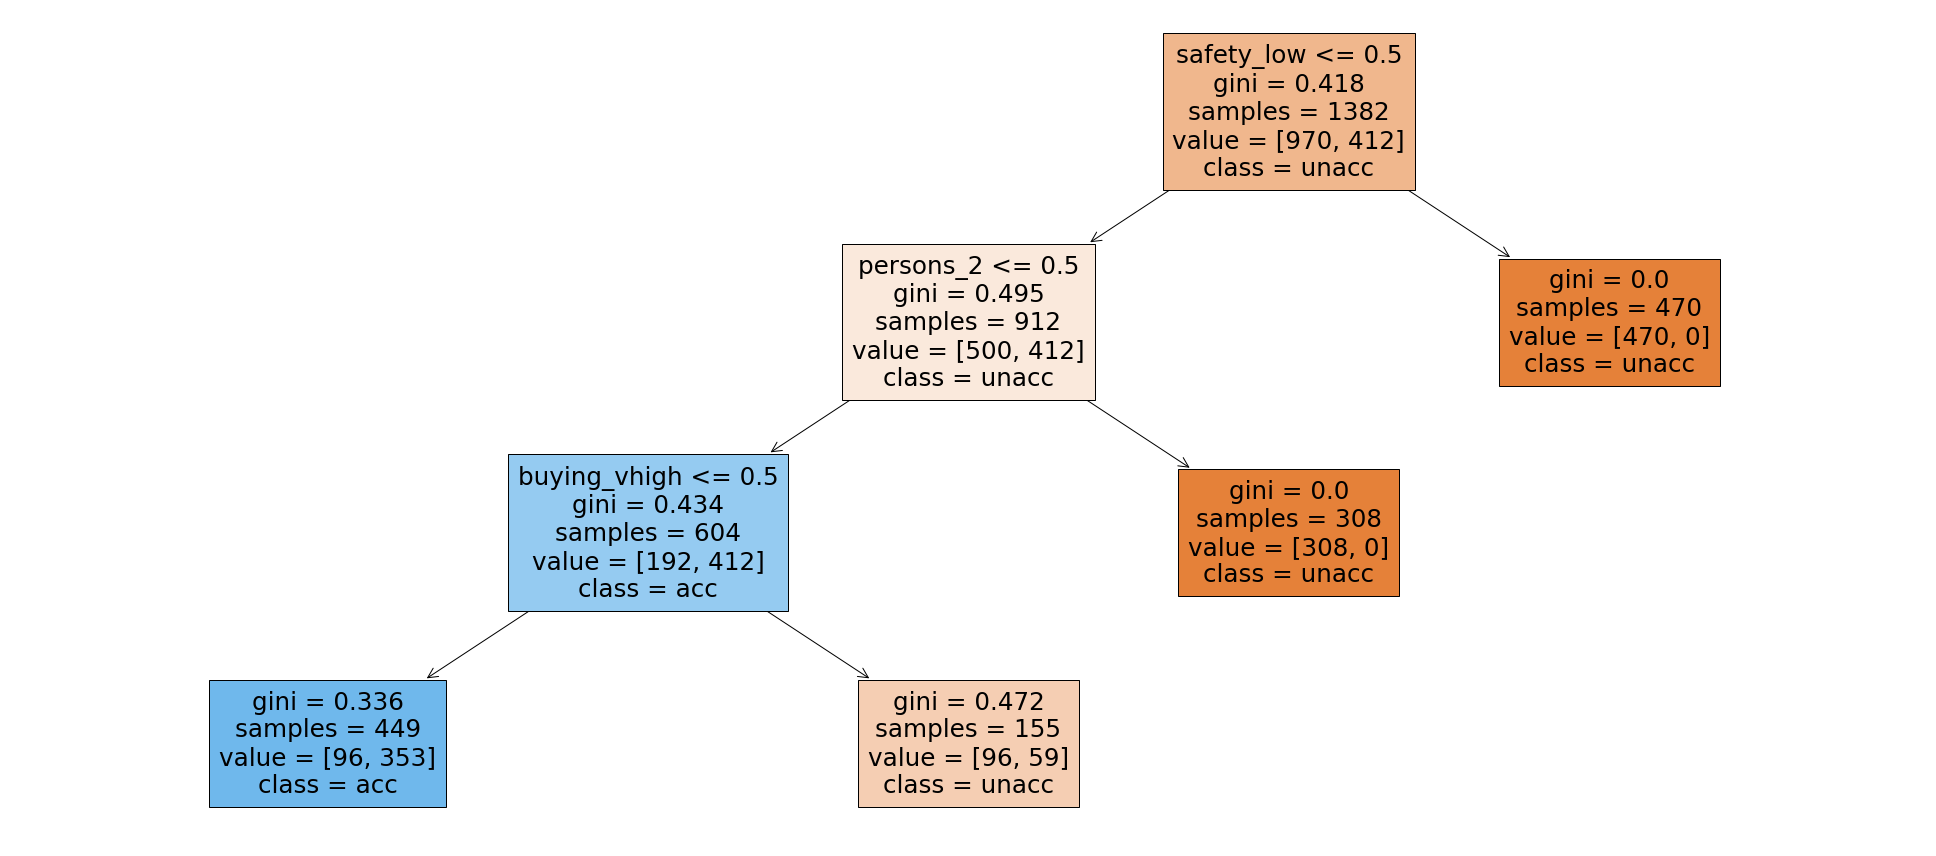

|--- safety_low <= 0.50
|   |--- persons_2 <= 0.50
|   |   |--- buying_vhigh <= 0.50
|   |   |   |--- class: True
|   |   |--- buying_vhigh >  0.50
|   |   |   |--- class: False
|   |--- persons_2 >  0.50
|   |   |--- class: False
|--- safety_low >  0.50
|   |--- class: False



In [11]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree, feature_names = x_train.columns, class_names = ['unacc','acc'], filled=True)
plt.tight_layout()
plt.show()

## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree, feature_names = x_train.columns.tolist()))